<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-06 13:46:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  10.4MB/s    in 20s     

2025-06-06 13:46:47 (9.88 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [4]:
!pip install pandas

In [5]:
!pip install matplotlib

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


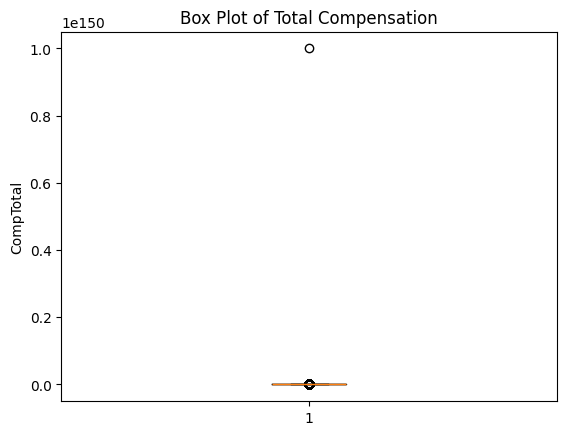

In [10]:
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
plt.boxplot(df['CompTotal'])
plt.title('Box Plot of Total Compensation')
plt.ylabel('CompTotal')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


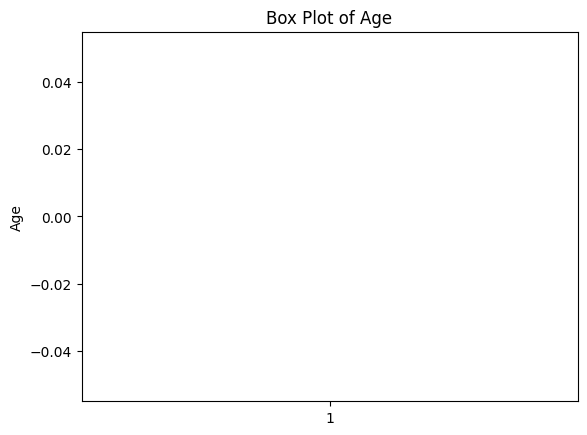

In [11]:
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.dropna(inplace=True)
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


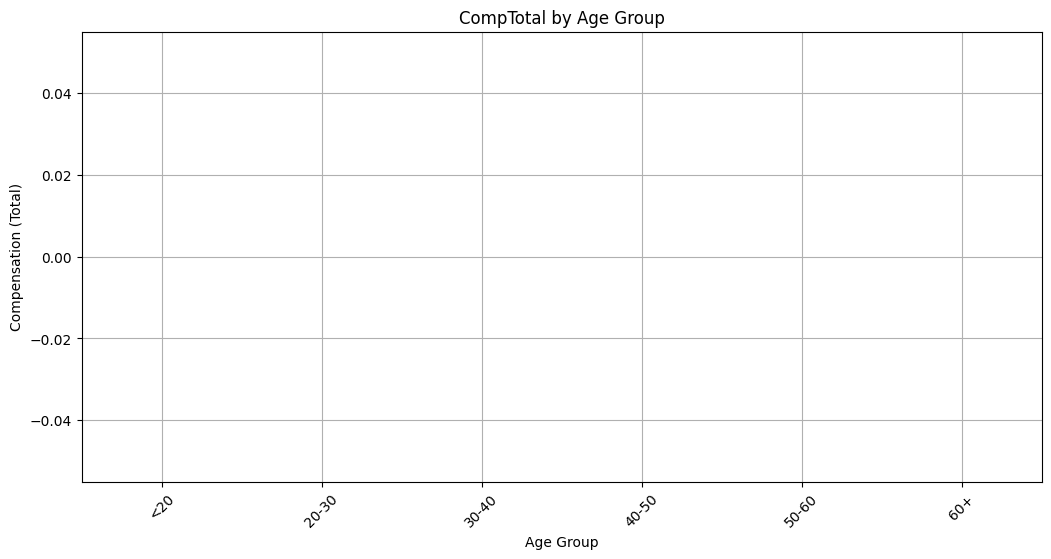

In [13]:
# Create age bins
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Now plot by age group
df.boxplot(column='CompTotal', by='AgeGroup', figsize=(12,6))
plt.title('CompTotal by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Compensation (Total)')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


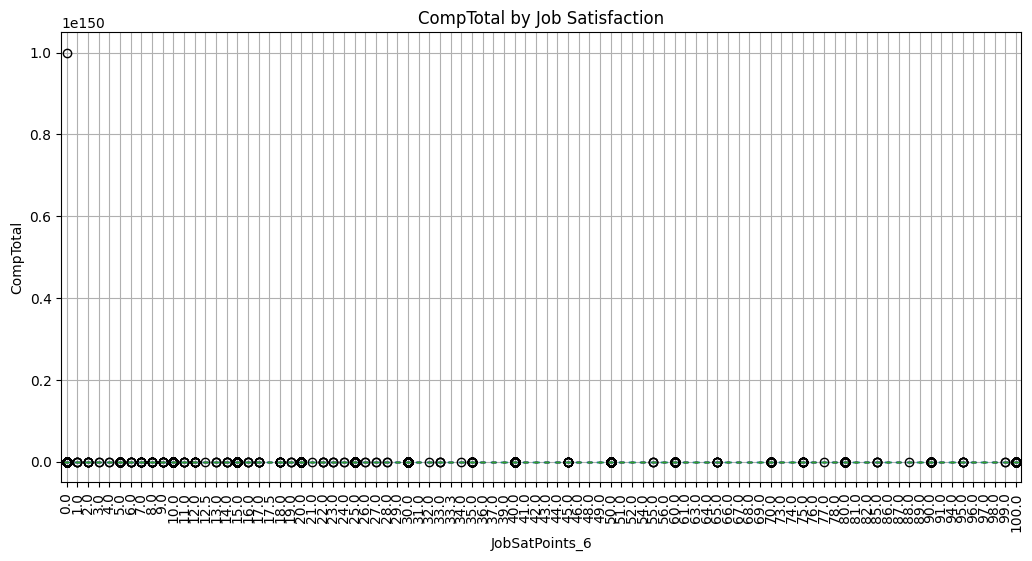

In [14]:
query = "SELECT JobSatPoints_6, CompTotal FROM main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
df.boxplot(column='CompTotal', by='JobSatPoints_6', figsize=(12,6))
plt.title('CompTotal by Job Satisfaction')
plt.suptitle('')
plt.ylabel('CompTotal')
plt.xticks(rotation=90)
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


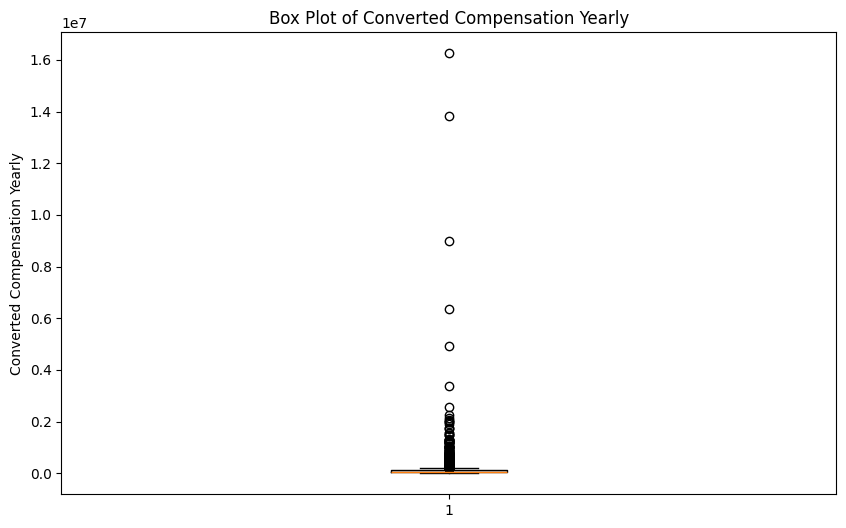

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query ConvertedCompYearly where it's not null
query = "SELECT ConvertedCompYearly FROM main WHERE ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Plot boxplot of ConvertedCompYearly
plt.figure(figsize=(10,6))
plt.boxplot(df['ConvertedCompYearly'])
plt.title('Box Plot of Converted Compensation Yearly')
plt.ylabel('Converted Compensation Yearly')
plt.show()

# Close the database connection
conn.close()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


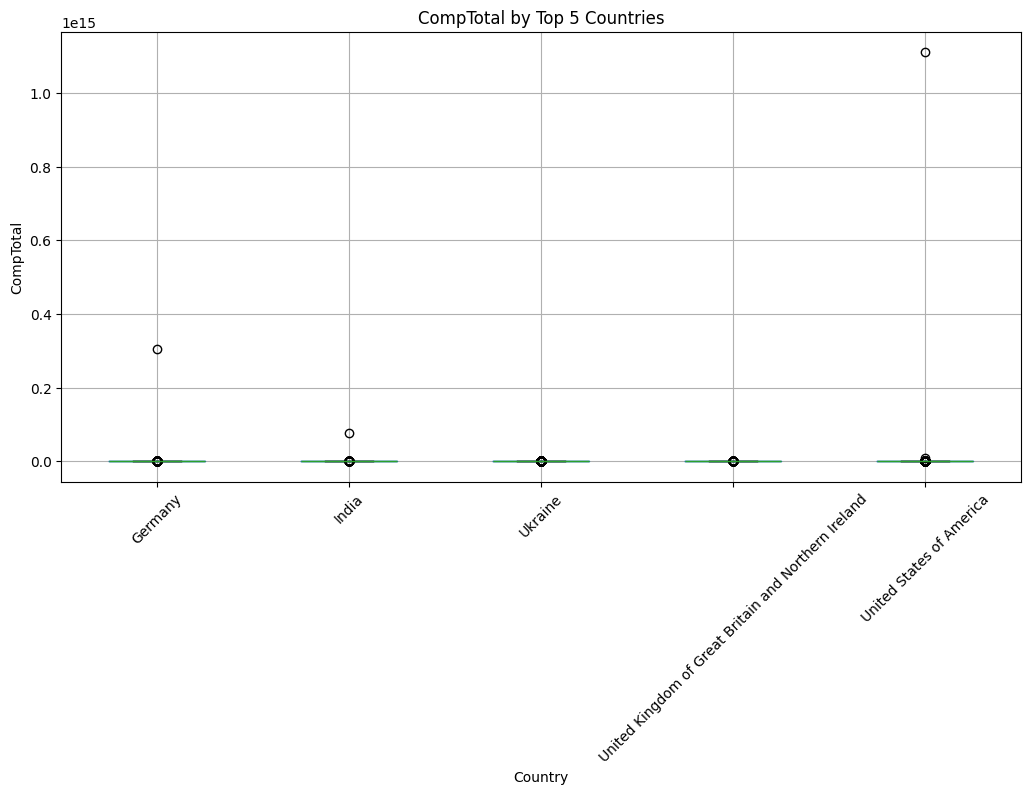

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query country and compensation data, filtering out nulls
query = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Get top 5 countries by number of entries
top5 = df['Country'].value_counts().head(5).index.tolist()

# Filter dataframe for only top 5 countries
df = df[df['Country'].isin(top5)]

# Create box plot of CompTotal by Country
df.boxplot(column='CompTotal', by='Country', figsize=(12,6))
plt.title('CompTotal by Top 5 Countries')
plt.suptitle('')  # Removes the automatic 'Boxplot grouped by Country' title
plt.xticks(rotation=45)
plt.ylabel('CompTotal')
plt.show()

# Close the connection
conn.close()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


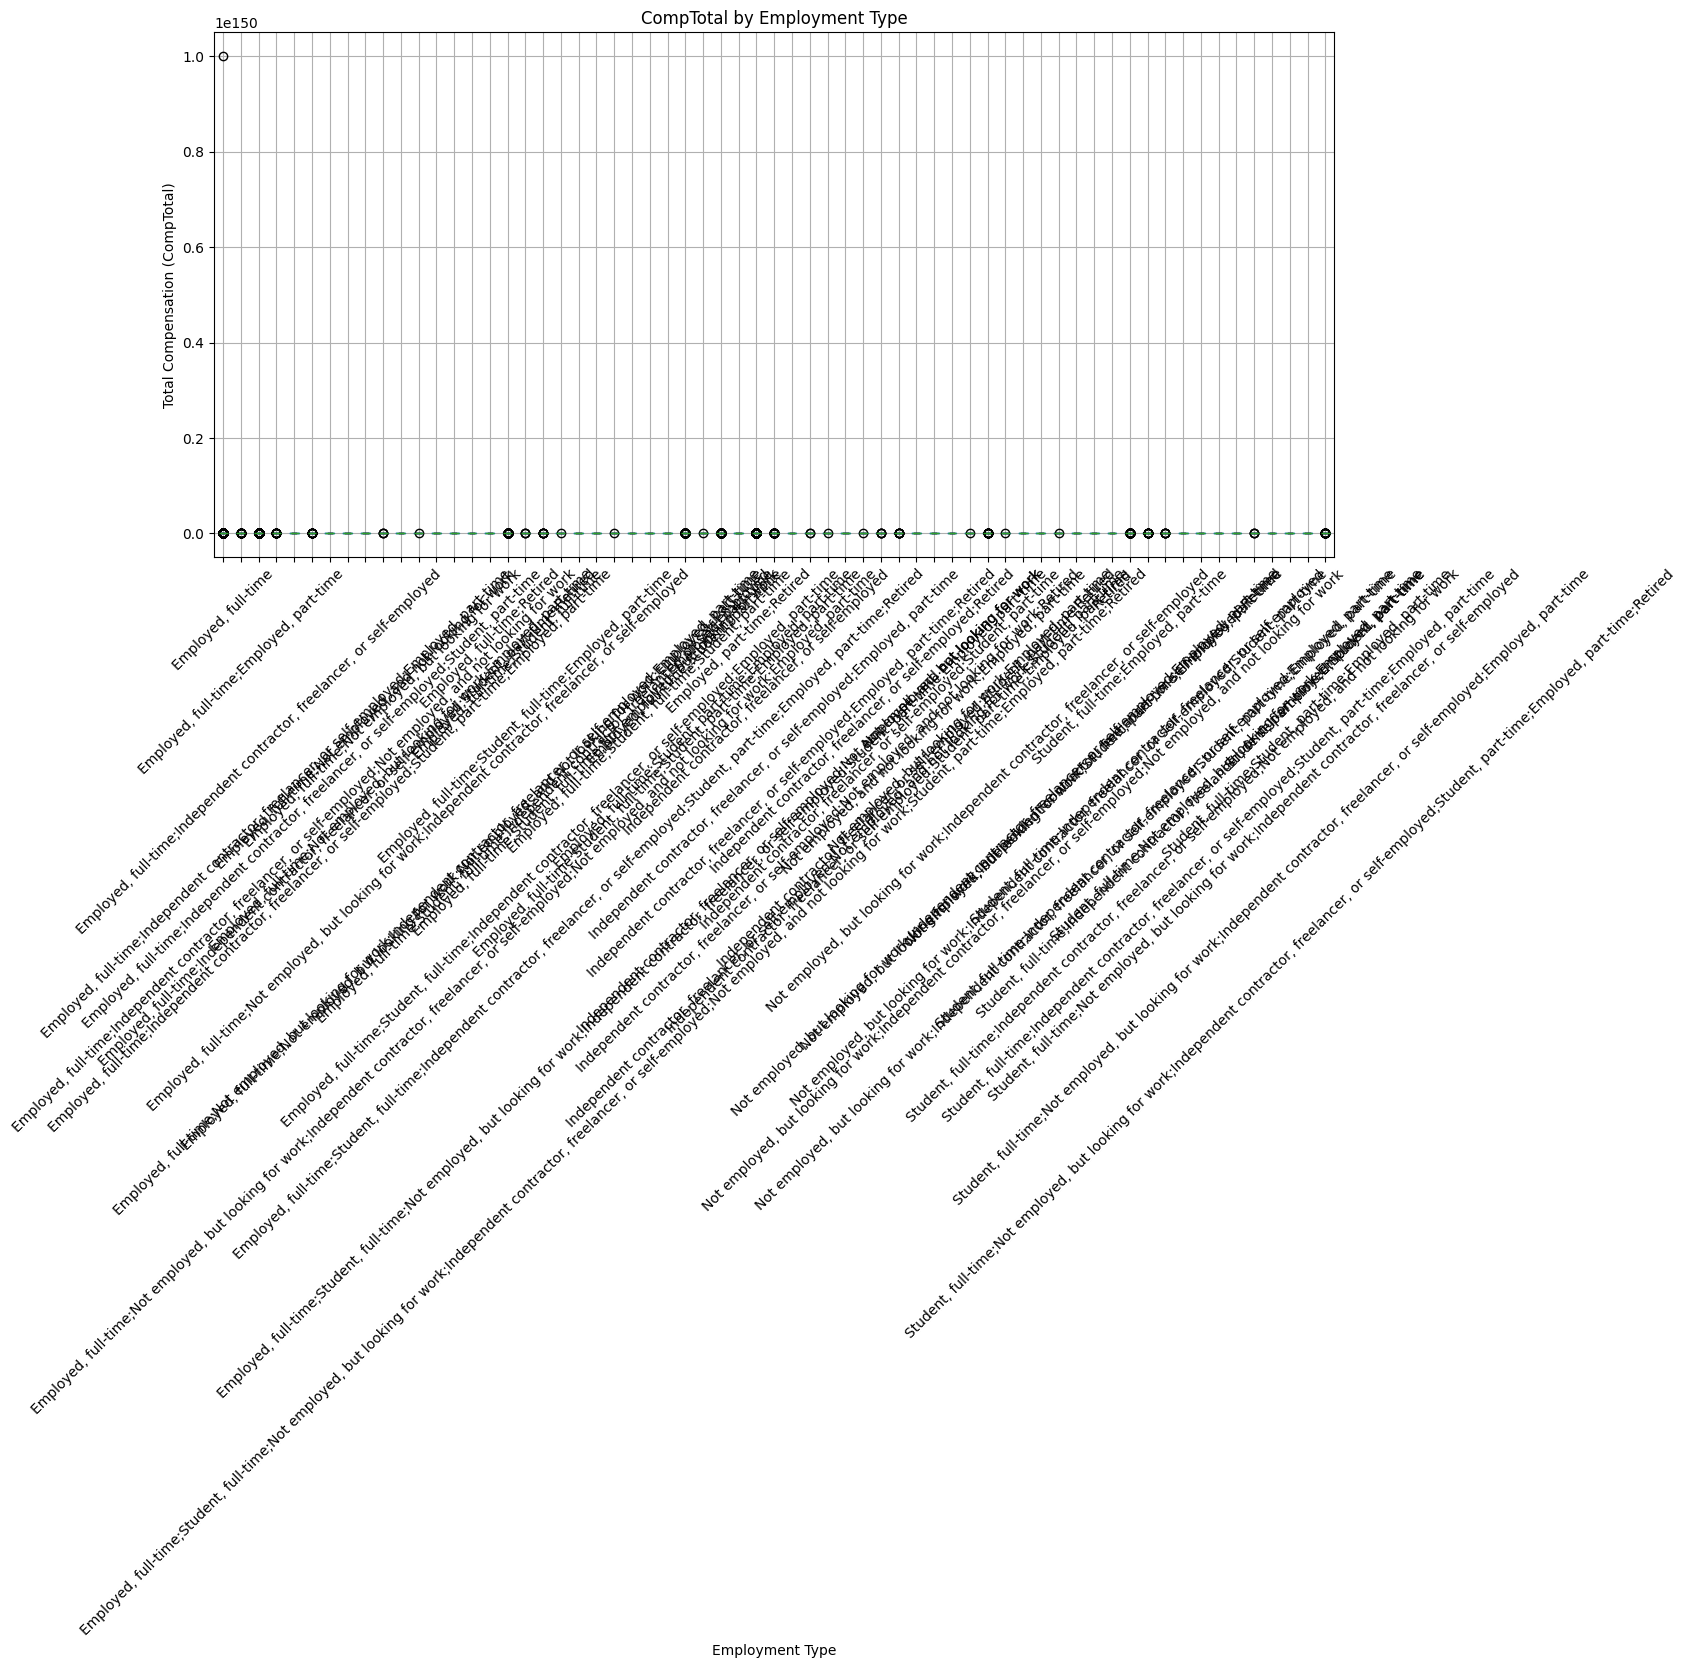

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query CompTotal and Employment, filtering out nulls
query = """
SELECT CompTotal, Employment 
FROM main 
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric, handle errors
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(inplace=True)

# Boxplot of CompTotal grouped by Employment type
df.boxplot(column='CompTotal', by='Employment', figsize=(14,7))
plt.title('CompTotal by Employment Type')
plt.suptitle('')  # Removes the default subtitle
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=45)
plt.show()

# Close the connection
conn.close()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


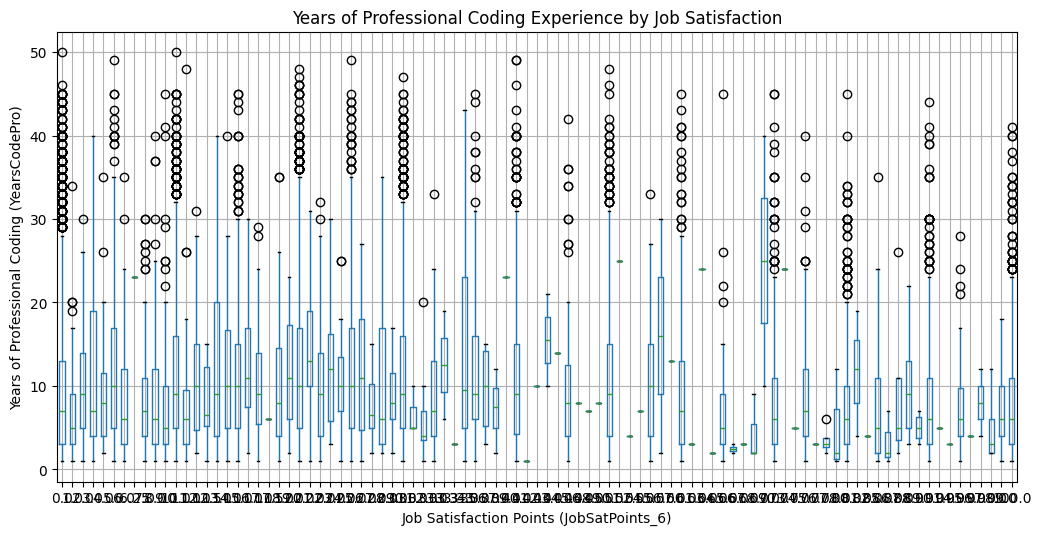

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query YearsCodePro and JobSatPoints_6, filtering out nulls
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro and JobSatPoints_6 to numeric, coercing errors
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with NaN after conversion
df.dropna(inplace=True)

# Boxplot of YearsCodePro grouped by JobSatPoints_6
df.boxplot(column='YearsCodePro', by='JobSatPoints_6', figsize=(12,6))
plt.title('Years of Professional Coding Experience by Job Satisfaction')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Job Satisfaction Points (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding (YearsCodePro)')
plt.show()

# Close the connection
conn.close()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [23]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
